# Modeling scenarios of the impact of social distancing vs. early termination of lockdown

### Bogdan Hlevca, Markham, Ontario 
(thanks to work done by Tirthajyoti Sarkar, Fremont, CA)

---

**Note:** For plots scroll down

---

## Simulations about what our choices are: 

 
In the following analysis, I will show how to various hypothetical scenarios that follow the fundamental epidemiological theory (SEIR) can affect the outcome of the pandemic: 
- **_"flattening the curve"_** 
- **_"herd immunity"_**, and 
- **_"lifting the lockdown too quickly"_**.

---

## The basic epidemiology model: SEIR

S, E, I, and R represent the fraction of population in the _Susceptible_, _Exposed_, _Infected_, and _Recovered_ categories.

![seir](images/SEIR.png)
<div style="text-align: right"> (https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology)</div>

###  The equations

The basic differential equations are:


$$\frac{dS}{dt} = -\rho.\beta.S.I $$

$$\frac{dE}{dt} = \rho.\beta.S.I - \alpha.E$$

$$\frac{dI}{dt} = \alpha.E - \gamma.I$$

$$\frac{dR}{dt} = \gamma.I$$

where,

- $\alpha$ is the inverse of the virus incubation period
- $\beta$ is the average contact rate in the population
- $\gamma$ is the inverse of the mean infectious period
- $\rho$ the social mixing coefficient

Higher values of $\rho$ translate in less social distancing. It can have a value from 0 to 1.


### References
- The [SEIR model of basic epidemiology](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology).
- [Social Distancing to Slow the Coronavirus](https://towardsdatascience.com/social-distancing-to-slow-the-coronavirus-768292f04296)**
- Github repo corresponding to the article above: https://github.com/dgoldman0/socialdistancing
- The greatest [global crisis since World War II](https://www.bloomberg.com/opinion/articles/2020-03-24/coronavirus-recession-it-will-be-a-lot-like-world-war-ii) 
- The [largest global pandemic since the 1918–19 Spanish Flu](https://www.cdc.gov/flu/pandemic-resources/1918-pandemic-h1n1.html) is upon us today. 
- The [daily rise of the death toll](https://www.worldometers.info/coronavirus/worldwide-graphs/) 
- The rapid, [exponential spread](https://www.forbes.com/sites/startswithabang/2020/03/17/why-exponential-growth-is-so-scary-for-the-covid-19-coronavirus/#2bf6b23f4e9b) 


# Visualizations

## Plot results (all four variables - susceptible, exposed, infected, and recovered)

The following plot assumes __natural__ evolution with no lockdown with mixing/interaction coefficient 0.9

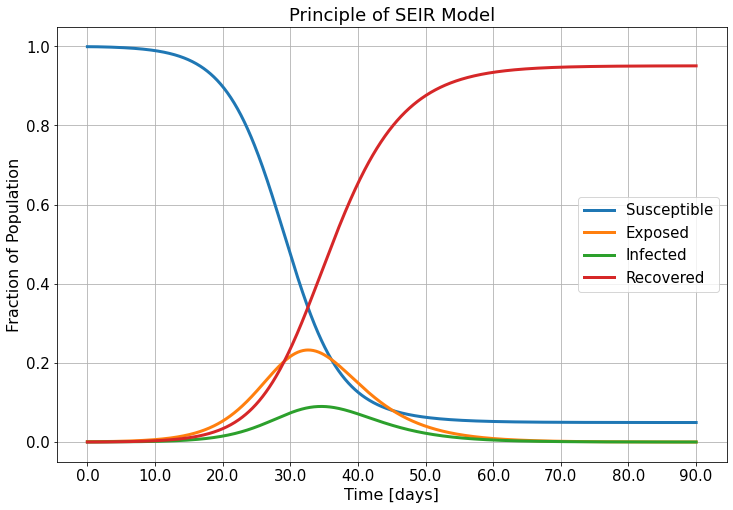

In [1]:
import SEIRanalysis
SEIRanalysis.SEIR.runScenarioOne()

## Run simulation for various social distancing factors
**Higher values mean less social distancing** (From 0.4 to 0.8) **i.e. higher social mixing/interactions**. 


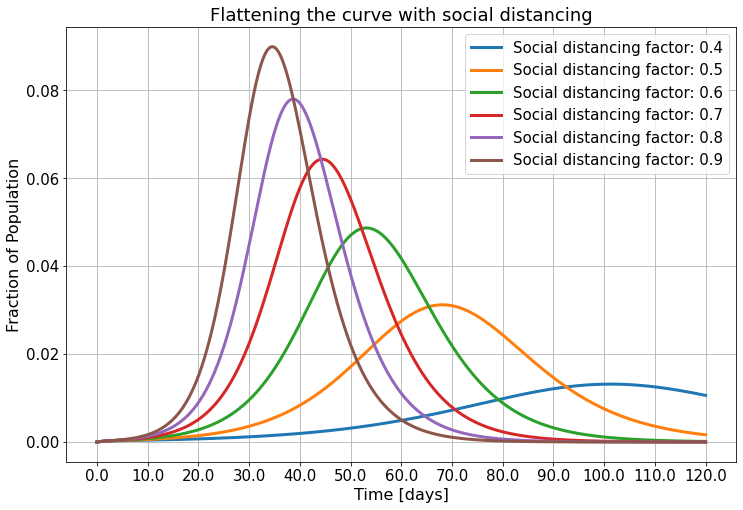

In [2]:
import SEIRanalysis
social_dist = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
SEIRanalysis.SEIR.runScenarioFlatteningCurve(social_dist)

## Social distancing scenarios

- "early termination of lockdown" (incease of social mixing)
- "stay-at-home" measures, which aim to reduce social mixing i.e. increase social distancing.

We start with a certain value of the social distancing factor, let it run for a certain amount of time, and then relax the norms i.e. increase the value of the social distancing factor, and see what happens to the infected population fraction. **We will observe a second peak appearing**. Depending on social and epidemiological factors, this second peak can be higher than the first one.

For this study, we will use two SEIR models, 
- The first model will run for a certain amount of time with a low social mixing factor (strict social distancing norm)
- The final values of the population proportion from this model will be fed into the second model.
- The second model will run with a higher value of social mixing (relaxed social distancing norm

###  Below is  a comparions of susceptible population evolution for various 'lockdown' scenarios 

 1. Letting the first 'lockdown' run for a longer time can potentially reduce the susceptible population to under 70% 
 2. Therefore when the lockdown is relaxed, there is less susceptible population for the virus to infect.

**Note**: Beyond 150 days, the susceptible fraction level does not go down significantly i.e. there is no visible reduction from 150 days case to the 270 days case. If the goal is to build herd immunity, the lockdown extension may be effective only up to a certain period.

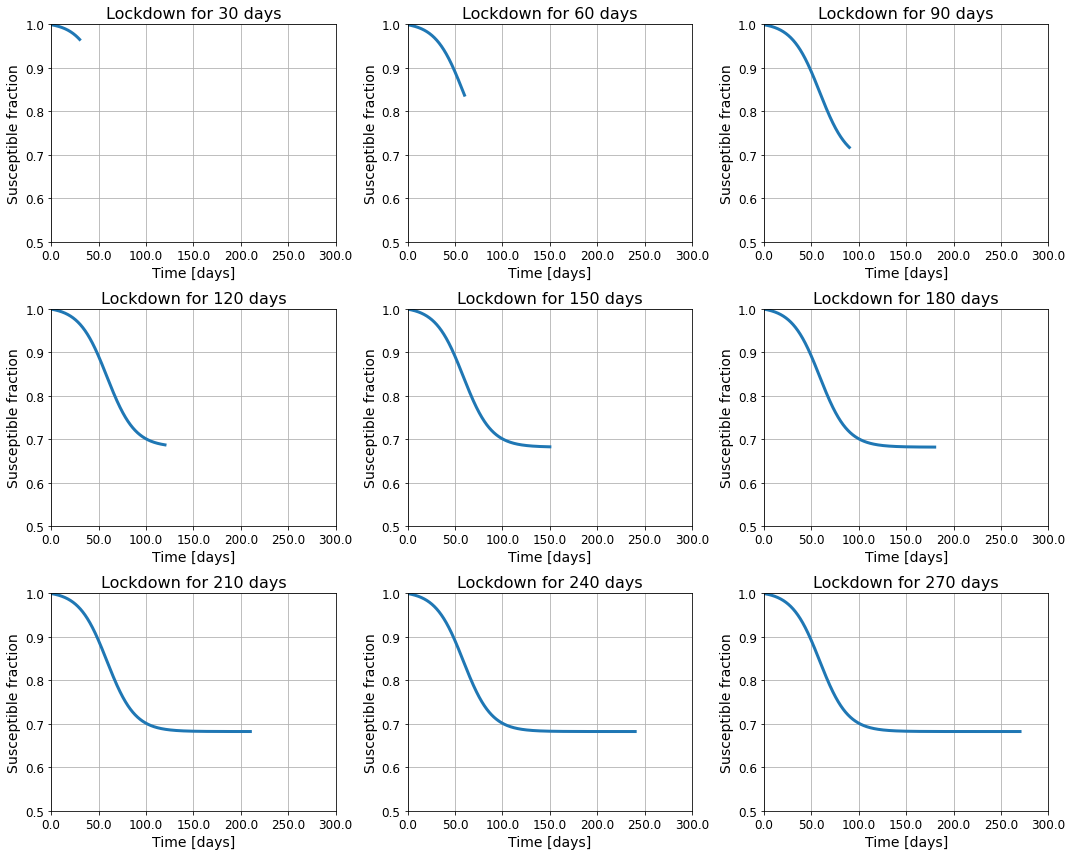

In [3]:
import SEIRanalysis
params = [0.7,2.1,0.7,0.4] # [S,E.I,R]
days = [30,60,90,120,150,180,210,240, 270]
SEIRanalysis.SEIR.runScenarioLockdown(params, days)

### Reduce peaks by letting the first lockdown run longer
Letting the first lockdown running longer(150 days) can potentially reduce both peaks. The first peak is higher in this experiment and occurs later than in the following plot. It s only around 0.018 or 1.8%.

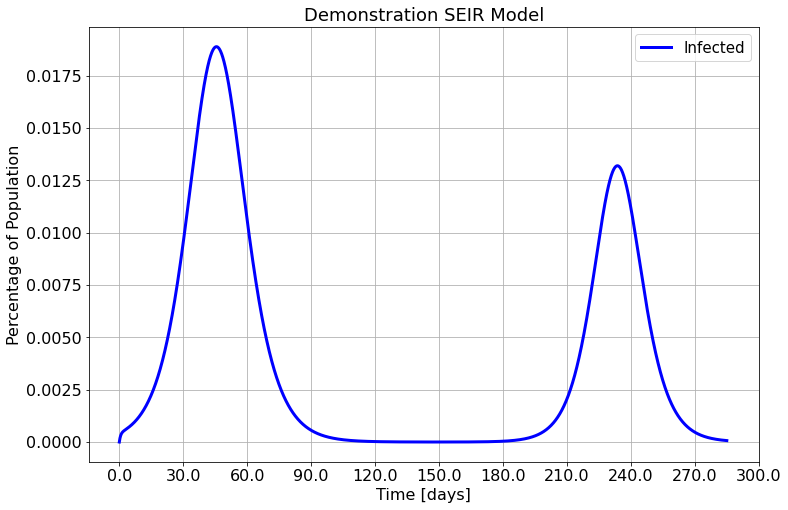

In [4]:
import SEIRanalysis
params = [0.7,2.1,0.7,0.4] # [S,E.I,R]
lockdown = 150 #days
rho = 0.9
SEIRanalysis.SEIR.runCalculatePeaks(params, lockdown, rho)

## Early release from lockdown

If we shorten the lockdown to 70 days Scenarios of social distancing have showed that a second peak of as high 2.2% of the population getting infected will occur.


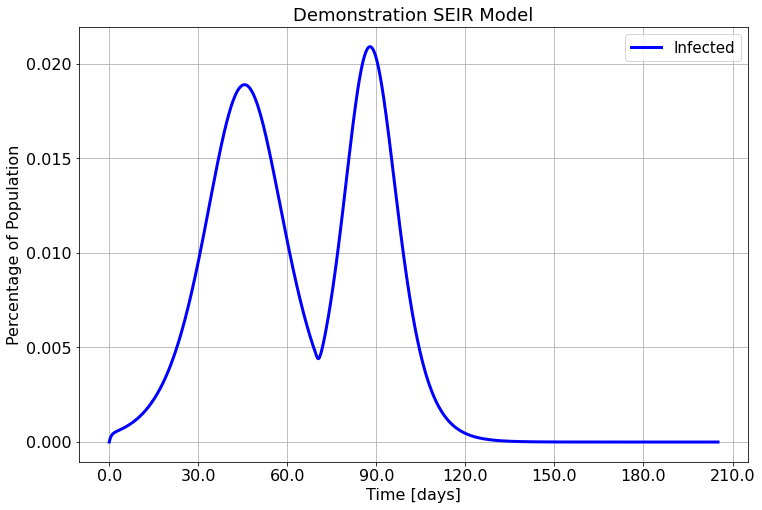

In [5]:
import SEIRanalysis
params = [0.7,2.1,0.7,0.4] # [S,E.I,R]
lockdown = 70
rho = 0.9 # will be passed after 90 days to the function
SEIRanalysis.SEIR.runCalculatePeaks(params, lockdown, rho)